In [59]:
from ramachandraw.utils import plot, fetch_pdb, get_phi_psi
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [60]:
pdb_id = "7mhg"

# Draw the Ramachandran plot
# plot(fetch_pdb(pdb_id))

print(type(fetch_pdb(pdb_id)))
print(fetch_pdb(pdb_id))
# Generate a dictionary to store the (phi, psi) torsion angles
# torsion_angles = get_phi_psi(fetch_pdb(pdb_id))

<class 'str'>
.pdb/pdb7mhg.ent


In [61]:
data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/166_N1")
summary_file = Path(data_dir, "summary_ref_15.csv")

summary_df = pd.read_csv(summary_file, index_col=0)
summary_df.head()


,index,job_id,cif_name,w_0,pdb,r_free,ff,N,J,w_1,w_2,w_3,w_4,w_5,w_6,w_7,delta,job_cif_str
508,508,5,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.293053,88.835005,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046053,7mhk
3300,3300,19,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.274136,714.633937,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027136,"7mhi,7mhk"
8053,8055,35,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.263804,7544.013477,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016804,"7mhg,7mhi,7mhk"
12765,12767,48,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.262198,1532.903358,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015198,"7mhf,7mhh,7mhi,7mhk"
18083,18085,60,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.267385,2278.918229,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020385,"7mhf,7mhh,7mhi,7mhj,7mhk"


In [62]:
def find_nth_largest_column(data, N):
    data = data[["w_{}".format(i) for i in range(8)]]
    data = data.astype(float)

    print(data)
    print(type(data["w_0"]))
    nth_largest_label = data.nlargest(N+1).index[-1]
    print(nth_largest_label)

    # df = df[["w_{}".format(i) for i in range(8)]]

    # # Flatten the DataFrame and sort the values
    # sorted_values = df.values.flatten()
    # sorted_values.sort()

    # # Get the Nth largest value. Note: -N because we want the Nth largest
    # nth_largest_value = sorted_values[-N]

    # # Identify the column that contains the Nth largest value
    # for column in df.columns:
    #     if nth_largest_value in df[column].values:
    #         return column

find_nth_largest_column(best_row, 2)

w_0    0.011907
w_1    0.039612
w_2    0.219342
w_3    0.123017
w_4    0.040468
w_5    0.160361
w_6    0.184168
w_7    0.221125
Name: 57822, dtype: float64
<class 'numpy.float64'>
w_6


In [86]:
pdb_files = list()
Ns = [1, 2, 4, 8]
Js = [1, 2, 3, 4, 5, 6]
phi_psi_arr = np.ndarray(shape=(len(Ns), len(Js), max(Ns)), dtype=object)

for i in range(len(Ns)):
    N = Ns[i]
    for j in range(len(Js)):
        J = Js[j]
        for k in range(N):
            subset_df = summary_df[(summary_df["cif_name"] == "7mhh") & (summary_df["N"] == N) & (summary_df["J"] == J)]
            best_row = subset_df[subset_df["r_free"] == subset_df["r_free"].min()].iloc[0]

            pdb_file = Path(best_row["pdb"])

            pdb_file = Path(data_dir, "summary_15_states/7mhh_N{}_J{}_{}.pdb".format(N, J, k))
            pdb_files.append(pdb_file)

            phi_psi_arr[i, j, k] = get_phi_psi(str(pdb_file))

# J = 2
# subset_df = summary_df[(summary_df["cif_name"] == "7mhh") & (summary_df["N"] == N) & (summary_df["J"] == J)]
# best_row = subset_df[subset_df["r_free"] == subset_df["r_free"].min()].iloc[0]

# pdb_file = Path(best_row["pdb"])

# max_w = 0
# max_state = 0
# for state in range(N):
#     if best_row["w_{}".format(state)] > max_w:
#         max_w = best_row["w_{}".format(state)]
#         max_state = state

# for i in range(8):
#     pdb_file = Path(data_dir, "summary_15_states/7mhh_N{}_J{}_{}.pdb".format(8, J, i))
#     pdb_files.append(pdb_file)

#     print(pdb_file)





/Users/matthew/opt/anaconda3/envs/plot/lib/python3.12/site-packages/ramachandraw/utils.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5.5, 5), dpi=dpi)


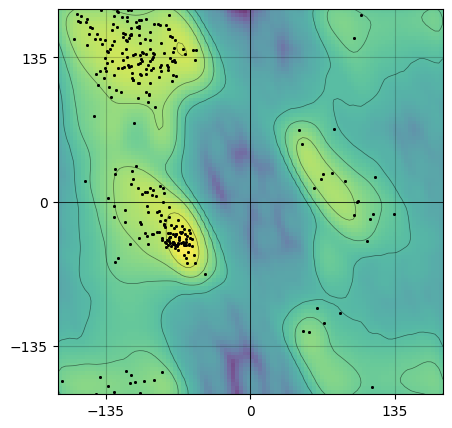

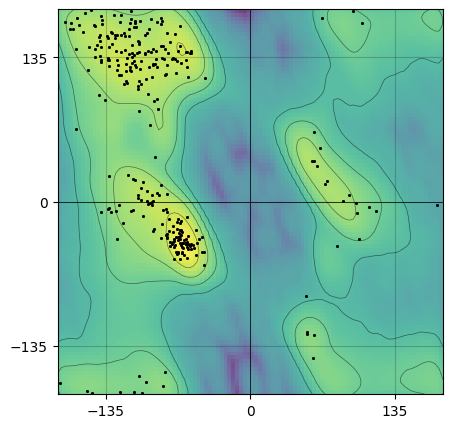

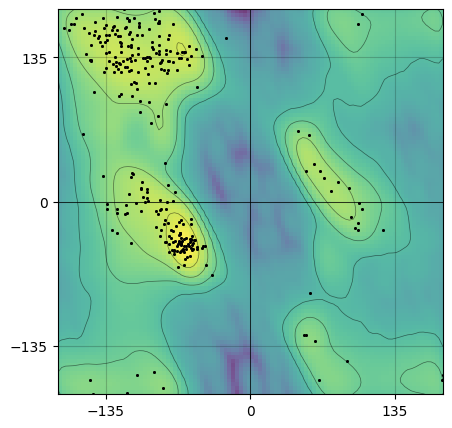

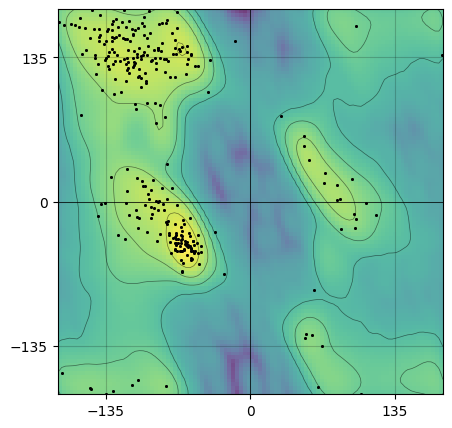

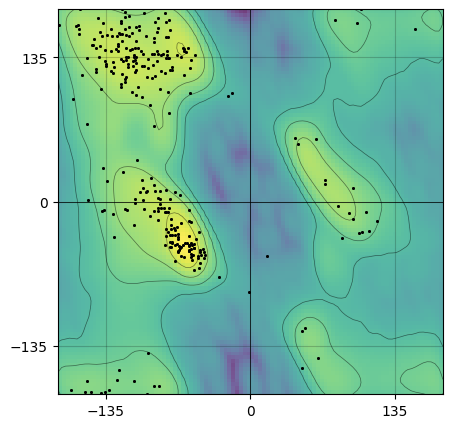

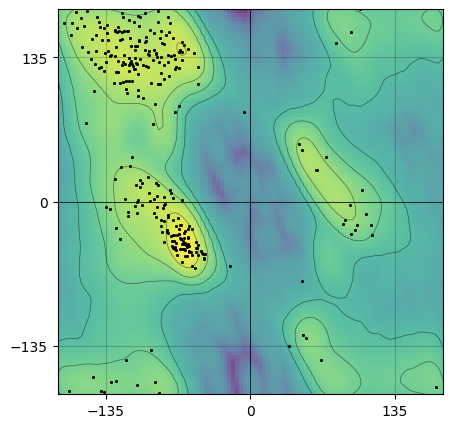

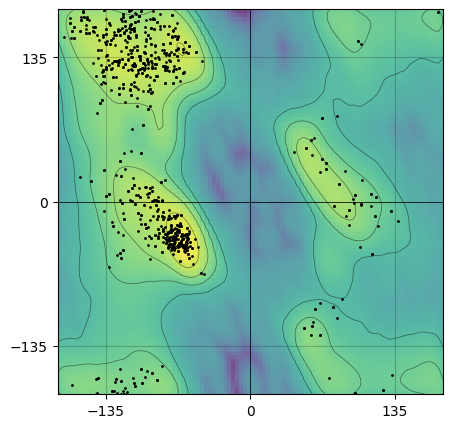

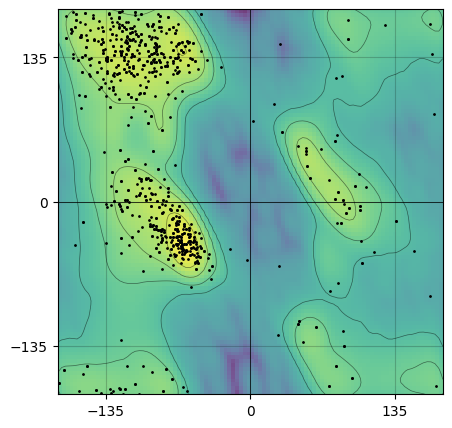

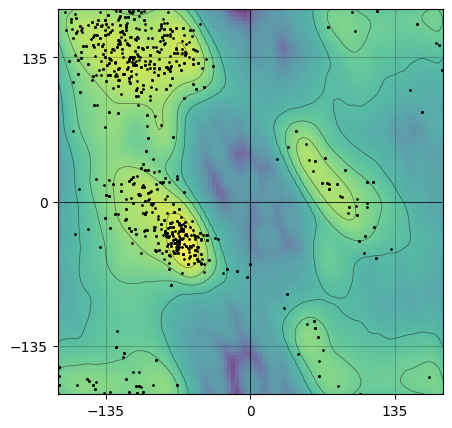

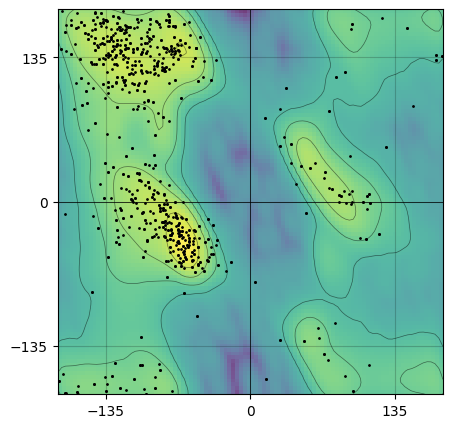

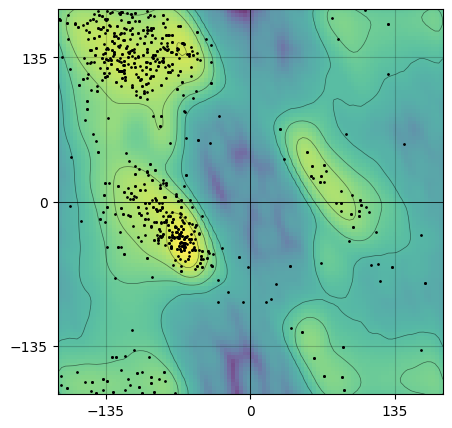

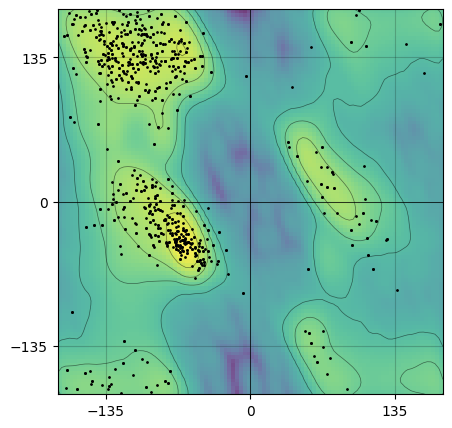

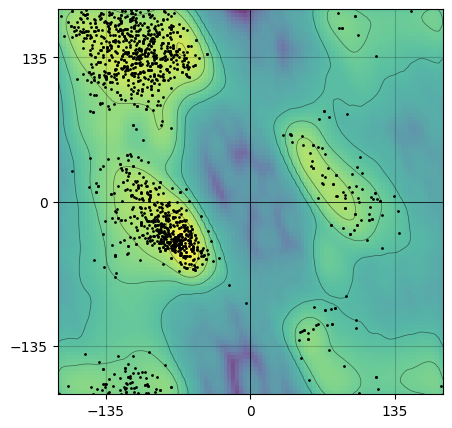

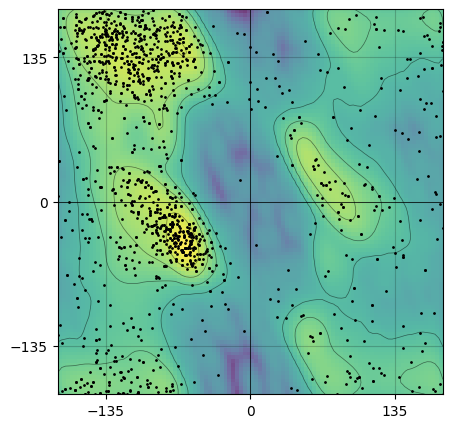

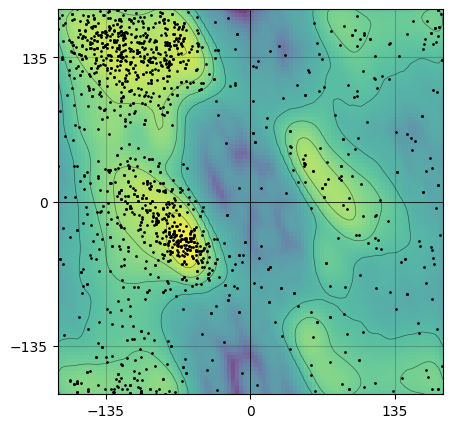

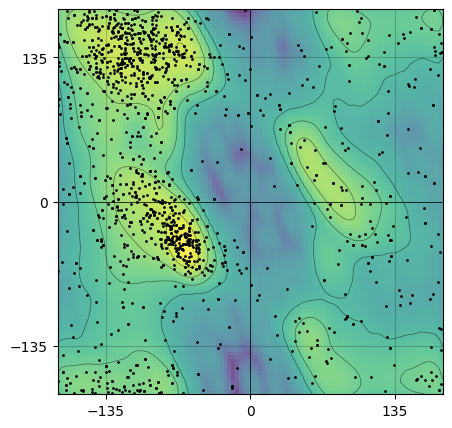

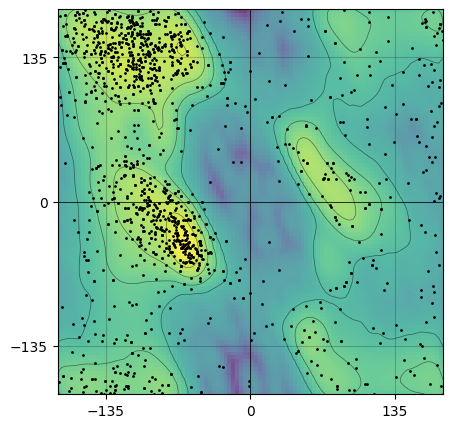

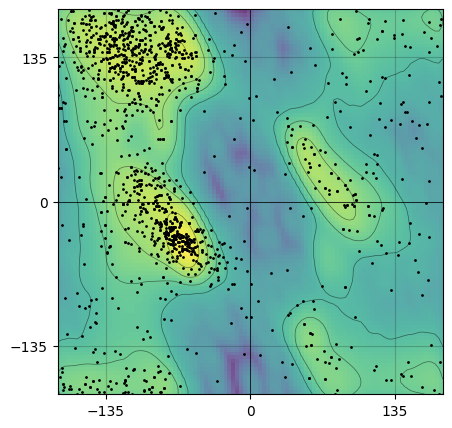

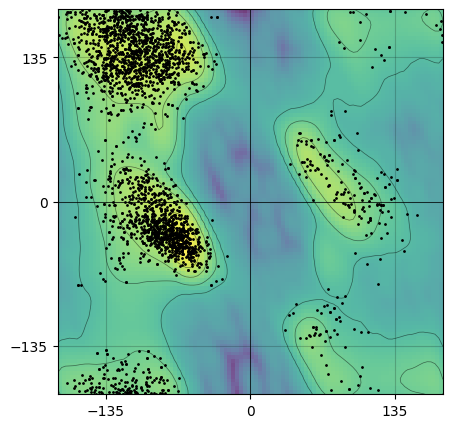

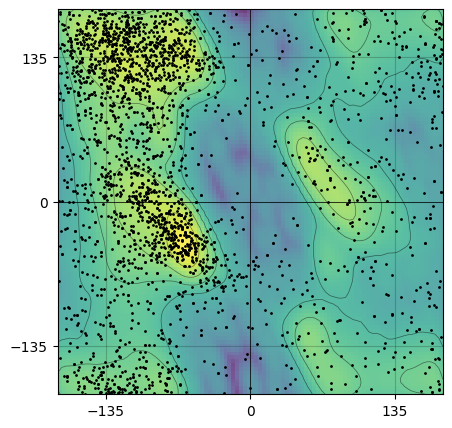

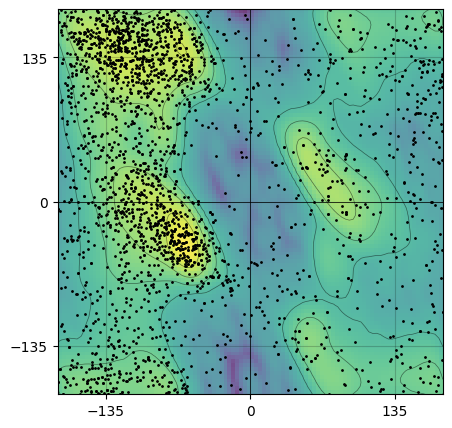

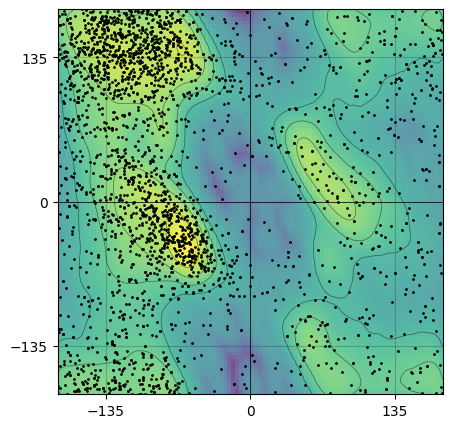

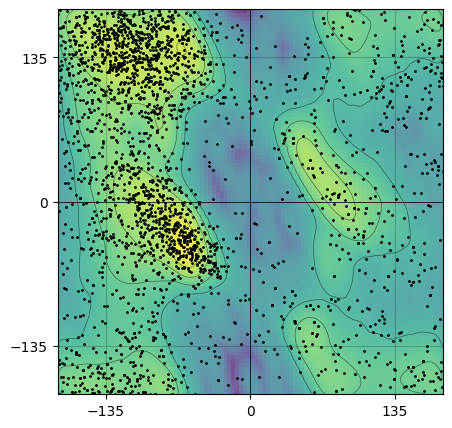

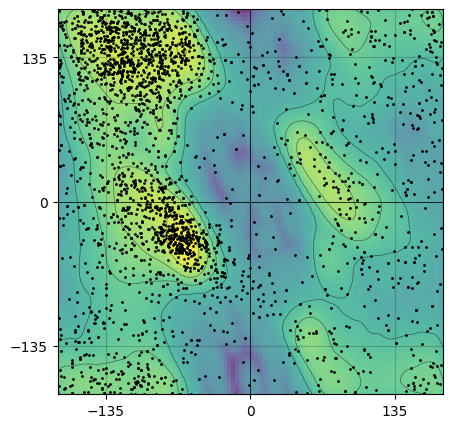

In [89]:
# ax = plot(str(pdb_files[0]), alpha=0.75, dpi=100, save=False, show=False)

for i in range(len(Ns)):
    N = Ns[i]
    for j in range(len(Js)):
        J = Js[j]
        pdb_file = Path(data_dir, "summary_15_states/7mhh_N{}_J{}_0.pdb".format(N, J))
        ax = plot(str(pdb_file), alpha=0.75, dpi=100, save=False, show=False)

        for k in range(N):
            phi_psi_dict = phi_psi_arr[i, j, k]
            phis = [phi_psi_dict[key][0] for key in phi_psi_dict.keys()]
            psis = [phi_psi_dict[key][1] for key in phi_psi_dict.keys()]
            ax.scatter(phis, psis, s=1, c='black', marker='o')

        ax.get_figure().gca().set_title("")
        ax.get_figure().gca().set_xlabel("")
        ax.get_figure().gca().set_ylabel("")
        ax.locator_params(axis='x', nbins=4)
        ax.locator_params(axis='y', nbins=4)
        plt.savefig(Path(Path.home(), "Desktop/rama_{}_{}.png".format(N, J)))

        # for key in phi_psi_dict.keys():
        #     ax.scatter(phi_psi_dict[key][0], phi_psi_dict[key][1], s=1, c='black', marker='o')


    # plt.savefig(Path(Path.home(), "Desktop/rama_{}.png".format(J)))

# plt.show()



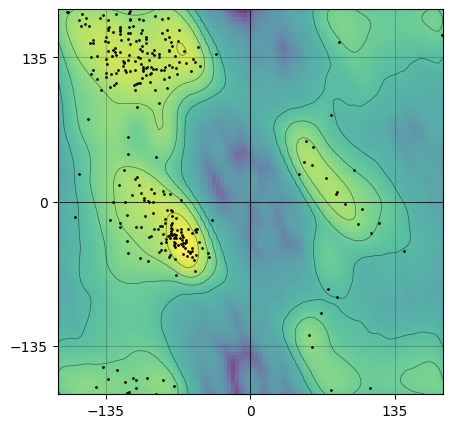

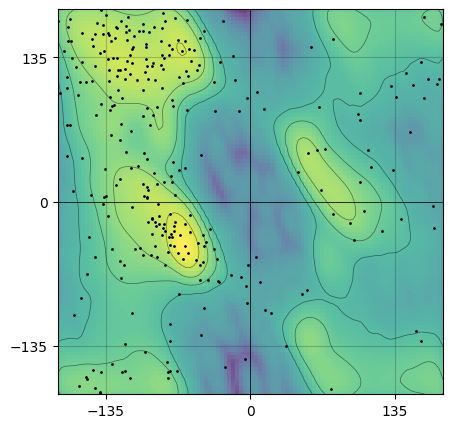

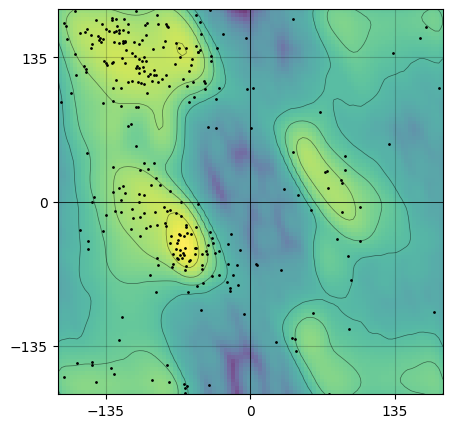

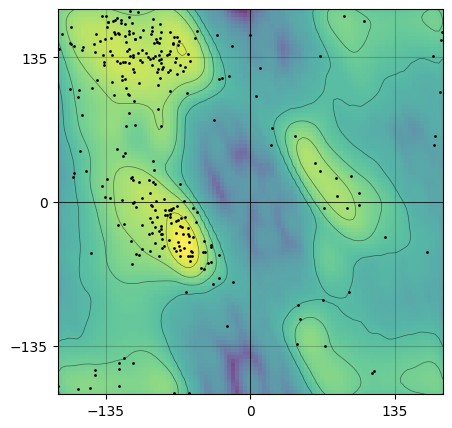

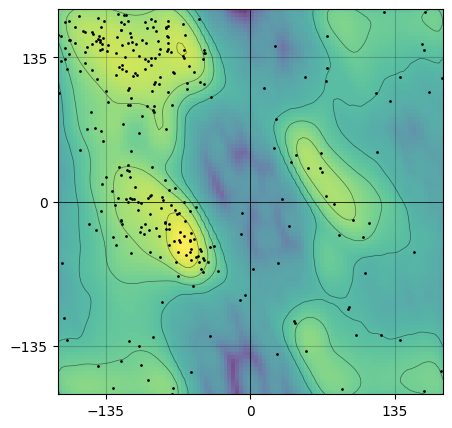

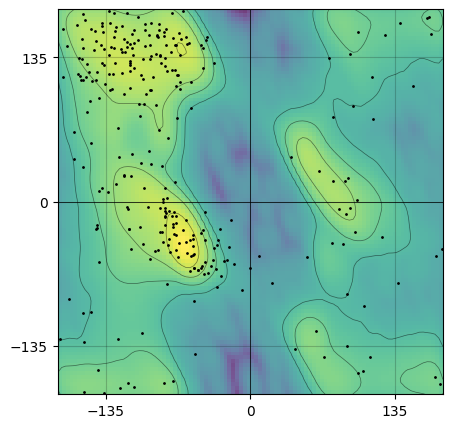

In [31]:
# ax = plot(pdb_files, alpha=0.75, dpi=100, save=False, show=False, filename="plot.png")
# ax.get_legend().remove()
# plt.show()

i = 0
for pdb_file in pdb_files:
    ax = plot(str(pdb_file), alpha=0.75, dpi=100, save=False, show=False, filename="plot.png")
    ax.get_figure().gca().set_title("")
    ax.get_figure().gca().set_xlabel("")
    ax.get_figure().gca().set_ylabel("")
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=4)

    # plt.show()

    plt.savefig(Path(Path.home(), "Desktop/rama_{}.png".format(i)))

    i = i + 1
